In [14]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# img=cv2.imread("/content/drive/MyDrive/mosaic_2/Images/teri to.jpeg" , 1)
# cv2_imshow(img)
# print(img.shape)
# cv2_imshow(img)
# kernel1 = np.ones((3,3) , 'uint8')
# kernel2 = np.ones((3,3) , 'uint8')
# img2=cv2.dilate(img,kernel1,iterations=1)
# img3=cv2.erode(img,kernel2,iterations=1)
# cv2_imshow(img2)
# cv2_imshow(img3)

# # Read image 
# # img = cv2.imread('lanes.jpg', cv2.IMREAD_COLOR) # road.png is the filename
# # Convert the image to gray-scale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Find the edges in the image using canny detector
# edges = cv2.Canny(gray, 50, 100)
# cv2_imshow(edges)
# # Detect points that form a line
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 120 , minLineLength=10, maxLineGap=250)
# # Draw lines on the image
# # for line in lines:
# x1, y1, x2, y2 = lines[0][0]
# print(x2-x1)
# cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
# # Show result
# cv2_imshow( img)

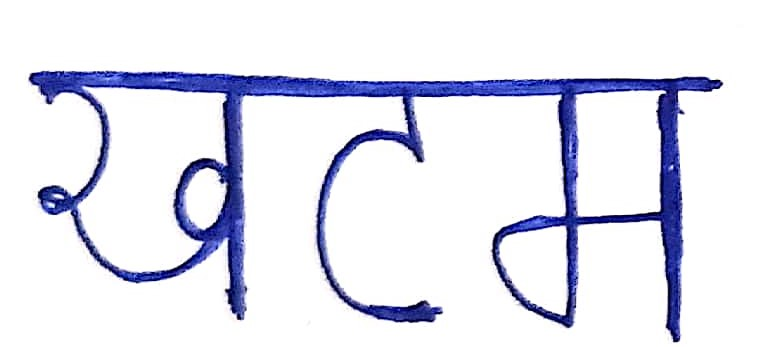

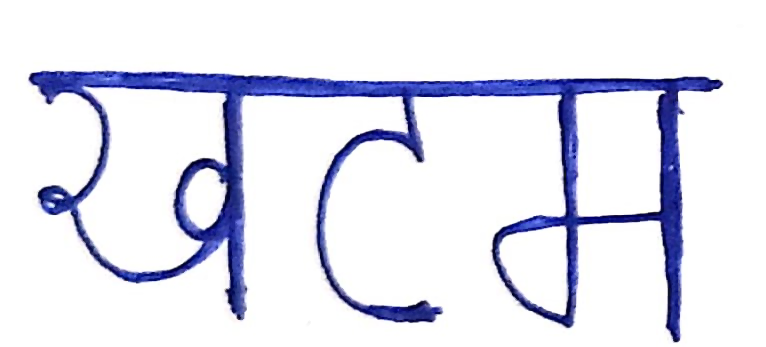

In [16]:
img=cv2.imread("/content/drive/MyDrive/mosaic/seg_try_photos/khatam.jpeg" , 1)
cv2_imshow(img)
for i in range(3):
  img2 = cv2.medianBlur(img, 3 )
# cv2_imshow(img2)
# img3 = cv2.GaussianBlur(img, 3 , iterations=4)
cv2_imshow(img2)

# rgb_planes = cv2.split(img2)

# result_planes = []
# result_norm_planes = []
# for plane in rgb_planes:
#     dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
#     bg_img = cv2.medianBlur(dilated_img, 21)
#     diff_img = 255 - cv2.absdiff(plane, bg_img)
#     norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
#     result_planes.append(diff_img)
#     result_norm_planes.append(norm_img)

# result = cv2.merge(result_planes)
# result_norm = cv2.merge(result_norm_planes)

# cv2_imshow(result)

# cv2.imwrite('shadows_out.png', result)
# cv2.imwrite('shadows_out_norm.png', result_norm)?

In [ ]:
# img = cv2.imread('/content/drive/MyDrive/mosaic_2/Images/bakat.jpeg',0)
# edges = cv2.Canny(img,50,100)

# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# # plt.show()
# cv2_imshow(edges)

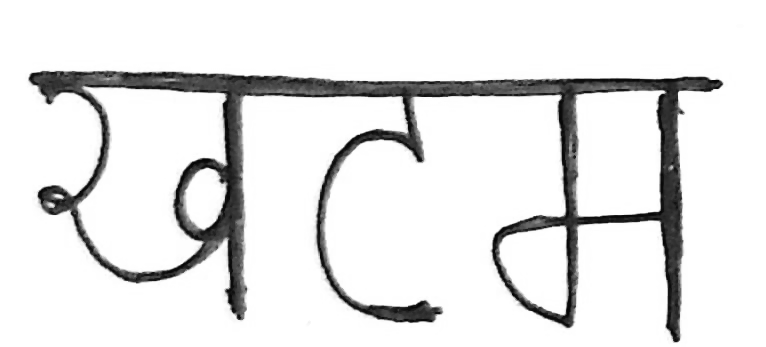

In [17]:
gray_img=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
# #denoising 

# dn_img=cv2.fastNlMeansDenoising(gray_img);
# cv2_imshow(dn_img)
# #= cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)

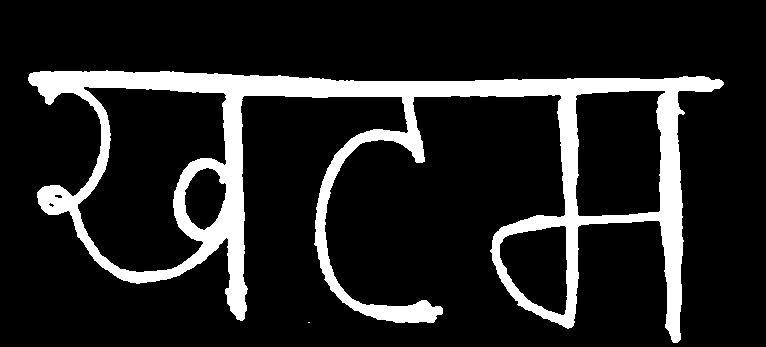

In [18]:
#ret, bw_img = cv2.threshold(gray_img, 140, 255, cv2.THRESH_BINARY)
bw_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 199, 5)
cv2_imshow(bw_img)

In [ ]:
# th, th_img = cv2.threshold(bw_img, 220, 255, cv2.THRESH_BINARY_INV) 
# cv2_imshow(th_img) #"Thresholded Image Binary inverse", 
# print(th_img.shape)

In [ ]:
#ALWAYS REMEMBER THAT THE TOTAL WORD HAS TO BE CONNECTED BY A LINE 

In [19]:


noise=(bw_img.shape[0]*bw_img.shape[1])/100
print(noise)

2658.02


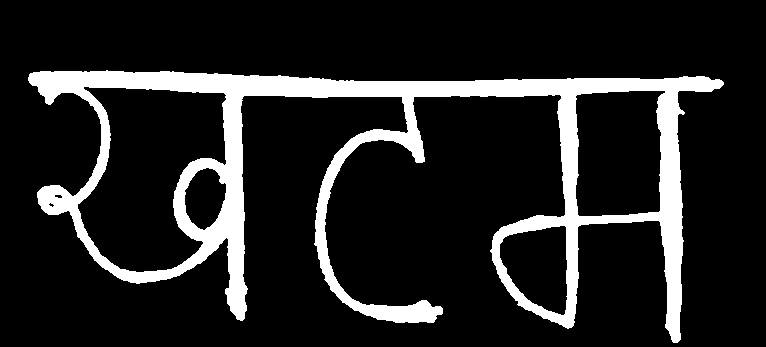

In [20]:
ret, binary_map = cv2.threshold(bw_img,127,255,0)

# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_map, None, None, None, 8, cv2.CV_32S)

#get CC_STAT_AREA component as stats[label, COLUMN] 
areas = stats[1:,cv2.CC_STAT_AREA]

dn2_img = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if areas[i] >= noise:   #keep
        dn2_img[labels == i + 1] = 255
cv2_imshow(dn2_img)  #"Result", 

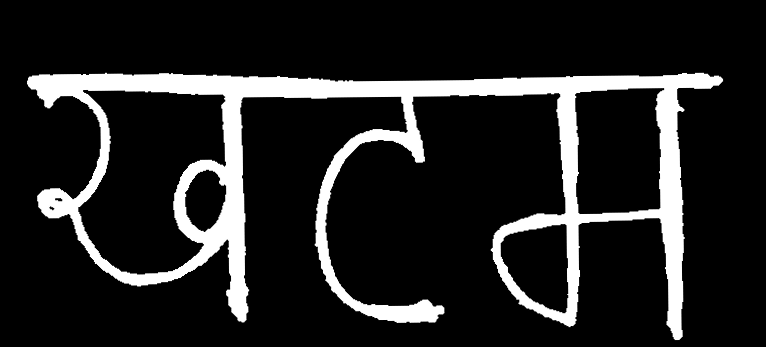

In [21]:
#ROTATION CORRECTNESS

#finding the angle at which the image is present
coords = np.column_stack(np.where(dn2_img > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
	angle = -(90 + angle)
else:
	angle = -angle

#rotating the image around the centre with the angle from above
(h, w) = dn2_img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rot_img = cv2.warpAffine(dn2_img, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2_imshow(rot_img)


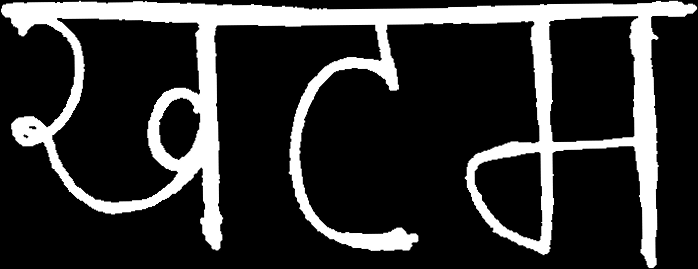

(269, 698)
(308, 800)


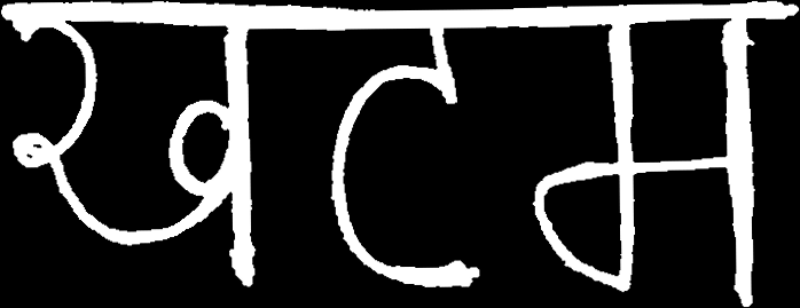

In [22]:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

crop_img=crop_image(rot_img)
cv2_imshow(crop_img)

print(crop_img.shape)

resize_parm=(800/crop_img.shape[1])
resize_width=(int)(resize_parm*crop_img.shape[1])
resize_height=(int)(resize_parm*crop_img.shape[0])
crop_img = cv2.resize(crop_img , (resize_width, resize_height))

print(crop_img.shape)

cv2_imshow(crop_img)

In [23]:
def segmentation(bordered, thresh=255, min_seg=50, scheck=0.25):
    try:
        shape = bordered.shape
        check = int(scheck * shape[0])
        image = bordered[:]
        image = image[check:].T
        shape = image.shape
        #plt.imshow(image)
        #plt.show()

        #find the background color for empty column
        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
            if  (np.equal(bg, image[row]).all()):
                bg_keys.append(row)            

        lenkeys = len(bg_keys)-1
        new_keys = [bg_keys[1], bg_keys[-1]]
        #print(lenkeys)
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
                #print(i)


        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates =[]
        first = 0
        bounding_boxes = []
        for key in new_keys[1:]:
            segment = bordered.T[first:key]
            if segment.shape[0]>=min_seg and segment.shape[1]>=min_seg:
                segmented_templates.append(segment.T)
                bounding_boxes.append((first, key))
            first = key
        
        last_segment = bordered.T[new_keys[-1]:]
        if last_segment.shape[0]>=min_seg and last_segment.shape[1]>=min_seg:
            segmented_templates.append(last_segment.T)
            bounding_boxes.append((new_keys[-1], new_keys[-1]+last_segment.shape[0]))

        
        return(segmented_templates, bounding_boxes)
    except:
        return [bordered, (0, bordered.shape[1])]
segments=segmentation(crop_img)

images=list()

for simg in segments[0]:
    
    
    # if we detect an image with only rekha on it then it would work
    simg_copy=simg.copy()

    #ret, binary_map = cv2.threshold(simg,127,255,0)
    #nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_map, None, None, None, 8, cv2.CV_32S)
    #areas = stats[1:,cv2.CC_STAT_AREA]
    #simg = np.zeros((labels.shape), np.uint8)
    #needed_area=0;
    #for i in range(0, nlabels - 1):
    #     needed_area+=areas[i]
    # if needed_area >= 0: #keep
    #   simg_copy=crop_image(simg_copy)
    images.append(simg_copy)

        

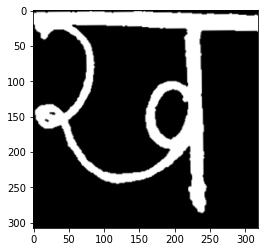

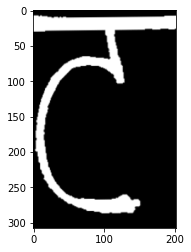

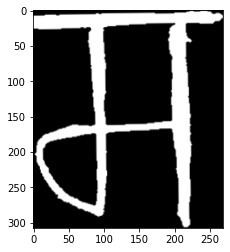

In [24]:
for image in images:
  #cv2_imshow(image)
  plt.imshow(image, cmap="gray")
  plt.show()